In [48]:
import streamlit as st
# Set the width of the Streamlit application
st.set_page_config(layout="wide")

from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from datetime import datetime, timedelta

# custom packages
from utils_dates import find_date_range, extract_date
from utils_analysis import customer_detail, partial_pipeline_summary
from utils_visualizations import vialualize_partial_pipeline, vialualize_total_pipeline


# Custom settings: Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Custom settings: Filter or ignore the warning
import warnings
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [49]:
df_pre = pd.read_csv('original_files/Pre-FTB_Report.csv')
df_post = pd.read_csv('original_files/Post-FTB_Report.csv')

df_pre['Annual hotel spend'] = df_pre['Annual hotel spend'].fillna(0).astype(int)
df_post['Annual hotel spend'] = df_post['Annual hotel spend'].fillna(0).astype(int)

In [50]:
# difference in the input files from pre to post
# the FTB includes both date and time
#  we just need the date
df_post['Expected FTB Date'] = [extract_date(date_time) for date_time in df_post['FTB or Revival Date'] ]
df_post = df_post.drop('FTB or Revival Date', axis=1)

In [51]:
pre_owners = np.sort(np.array(df_pre['Opportunity Owner'].unique()))
post_owners = np.sort(np.array(df_post['Opportunity Owner'].unique()))
missing_owners = [owner for owner in pre_owners if owner not in post_owners]
# I will only keep owners that are in both pre and post reports
# Convert arrays to sets
set1 = set(pre_owners)
set2 = set(post_owners)
# Find the intersection of the sets
common_elements = set1.intersection(set2)
# Convert the common elements set back to a list
names = list(common_elements)
# sort it alphabetically by family name
owners_list = sorted(names, key=lambda x: x.split()[1])

In [52]:
owner = 'Adam Ward'

In [53]:
detail_pre = customer_detail(df_pre,owner)
detail_post = customer_detail(df_post,owner)
detail_pre.set_index('Account Name', inplace=True)
detail_post.set_index('Account Name', inplace=True)

In [54]:
summ_pre = partial_pipeline_summary( detail_pre , detail_type = 'pre' )
summ_post = partial_pipeline_summary( detail_post , detail_type = 'post' )
merged_df = pd.concat([summ_post,summ_pre], sort=False).fillna(0)
# Calculate the sum of pre and post
row_sum = merged_df.iloc[0] + merged_df.iloc[2]
# Set a name for the new row
row_sum.name = '$ Total Pipeline'
# Append the sum as a new row to the dataframe
merged_df = merged_df.append(row_sum)
dfcommas = merged_df.applymap('{:,.0f}'.format)

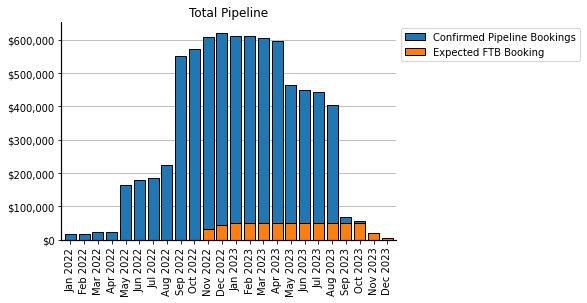

2023-05-22 19:16:25.783 
  command:

    streamlit run /usr/local/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [55]:
df = dfcommas
# Define a dictionary of custom colors for specific rows
custom_colors = {#'$ Confirmed Pipeline Bookings': 'white', 
                #'# Confirmed Pipeline Accounts': 'white',
                #'$ Expected FTB Booking': 'lightgray', 
                #'# Expected FTB Accounts': 'white',
                '$ Total Pipeline':'lightyellow'
                }

# Function to apply custom colors to rows
def apply_custom_colors(row):
    row_index = row.name
    if row_index in custom_colors:
        return ['background-color: {}'.format(custom_colors[row_index])] * len(row)
    else:
        return [''] * len(row)
    
# Apply the custom colors to the dataframe
styled_df = df.style.apply(apply_custom_colors, axis=1)
# Display the styled dataframe
  
df_total = merged_df.loc['$ Total Pipeline']
df_expected = merged_df.loc['$ Expected FTB Booking']

col1, col2 = st.columns(2)
with col1:
    vialualize_total_pipeline (df_total,df_expected)
    #st.pyplot(plt)
    with col2:
        st.empty()

In [56]:
styled_df

,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023
$ Confirmed Pipeline Bookings,"16,250","16,250","22,500","22,500","163,333","180,000","184,167","223,751","552,418","573,252","577,419","577,419","561,169","561,169","554,919","546,586","414,086","397,419","393,252","353,668","16,668","4,167",0,0
# Confirmed Pipeline Accounts,2,2,3,3,6,9,10,13,16,20,21,21,19,19,18,17,15,12,11,8,4,1,0,0
$ Expected FTB Booking,0,0,0,0,0,0,0,0,0,0,"31,251","44,151","50,401","50,401","50,401","50,401","50,401","50,401","50,401","50,401","50,401","50,401","19,150","6,250"
# Expected FTB Accounts,0,0,0,0,0,0,0,0,0,0,3,4,5,5,5,5,5,5,5,5,5,5,2,1
$ Total Pipeline,"16,250","16,250","22,500","22,500","163,333","180,000","184,167","223,751","552,418","573,252","608,670","621,570","611,570","611,570","605,320","596,987","464,487","447,820","443,653","404,069","67,069","54,568","19,150","6,250"


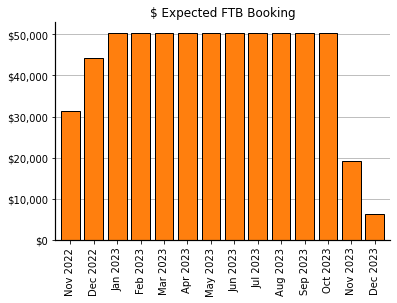

In [57]:
# Prospects (PRE-FTB) DETAIL
vialualize_partial_pipeline (detail_pre,detail_type='pre')

In [58]:
detail_pre

,Expected FTB Date,Annual hotel spend,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023
Account Name,,,,,,,,,,,,,,,,
Frontier Building Corp,11/30/2022,200001,16667,16667,16667,16667,16667,16667,16667,16667,16667,16667,16667,16667,0,0
Gorbel,12/13/2022,154801,0,12900,12900,12900,12900,12900,12900,12900,12900,12900,12900,12900,12900,0
Evolution Well Services,11/30/2022,125001,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,0,0
Gorbel,1/16/2023,75001,0,0,6250,6250,6250,6250,6250,6250,6250,6250,6250,6250,6250,6250
Blue Eagle Oilfield Services,11/23/2022,50001,4167,4167,4167,4167,4167,4167,4167,4167,4167,4167,4167,4167,0,0


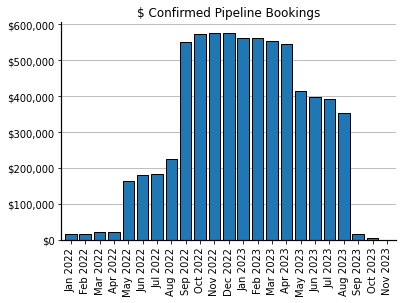

In [59]:
# Customers (POST-FTB) DETAIL
vialualize_partial_pipeline (detail_post,detail_type='post')

In [60]:
detail_post

,Expected FTB Date,Annual hotel spend,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023
Account Name,,,,,,,,,,,,,,,,,,,,,,,,,
Ascend Tek,09/14/2022,3500000,0,0,0,0,0,0,0,0,291667,291667,291667,291667,291667,291667,291667,291667,291667,291667,291667,291667,0,0,0
Global Roofing Group,05/12/2022,840000,0,0,0,0,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,0,0,0,0,0,0,0
Working America,05/18/2022,750000,0,0,0,0,62500,62500,62500,62500,62500,62500,62500,62500,62500,62500,62500,62500,0,0,0,0,0,0,0
National Water Services,08/16/2022,300000,0,0,0,0,0,0,0,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,0,0,0,0
Palm Health Resources,09/19/2022,300000,0,0,0,0,0,0,0,0,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,0,0,0
A2V,09/05/2022,144000,0,0,0,0,0,0,0,0,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,0,0,0
Longfellow Energy LP,08/17/2022,125000,0,0,0,0,0,0,0,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,0,0,0,0
"Arete Construction Services, LLC",01/14/2022,120001,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,0,0,0,0,0,0,0,0,0,0,0
Beachview Energy,10/04/2022,100001,0,0,0,0,0,0,0,0,0,8333,8333,8333,8333,8333,8333,8333,8333,8333,8333,8333,0,0,0
